In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


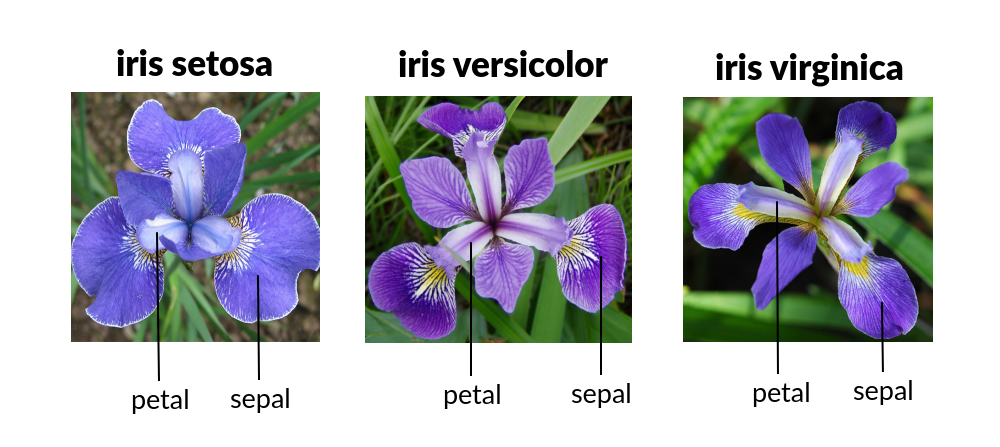

In [4]:
iris.groupby("species").mean().style.background_gradient(cmap="coolwarm")

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.588000,2.974000,5.552000,2.026000


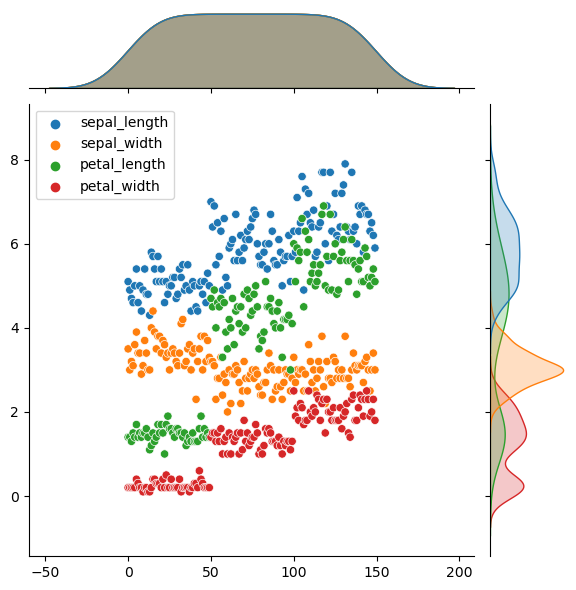

In [5]:
sns.jointplot(iris)
plt.show()

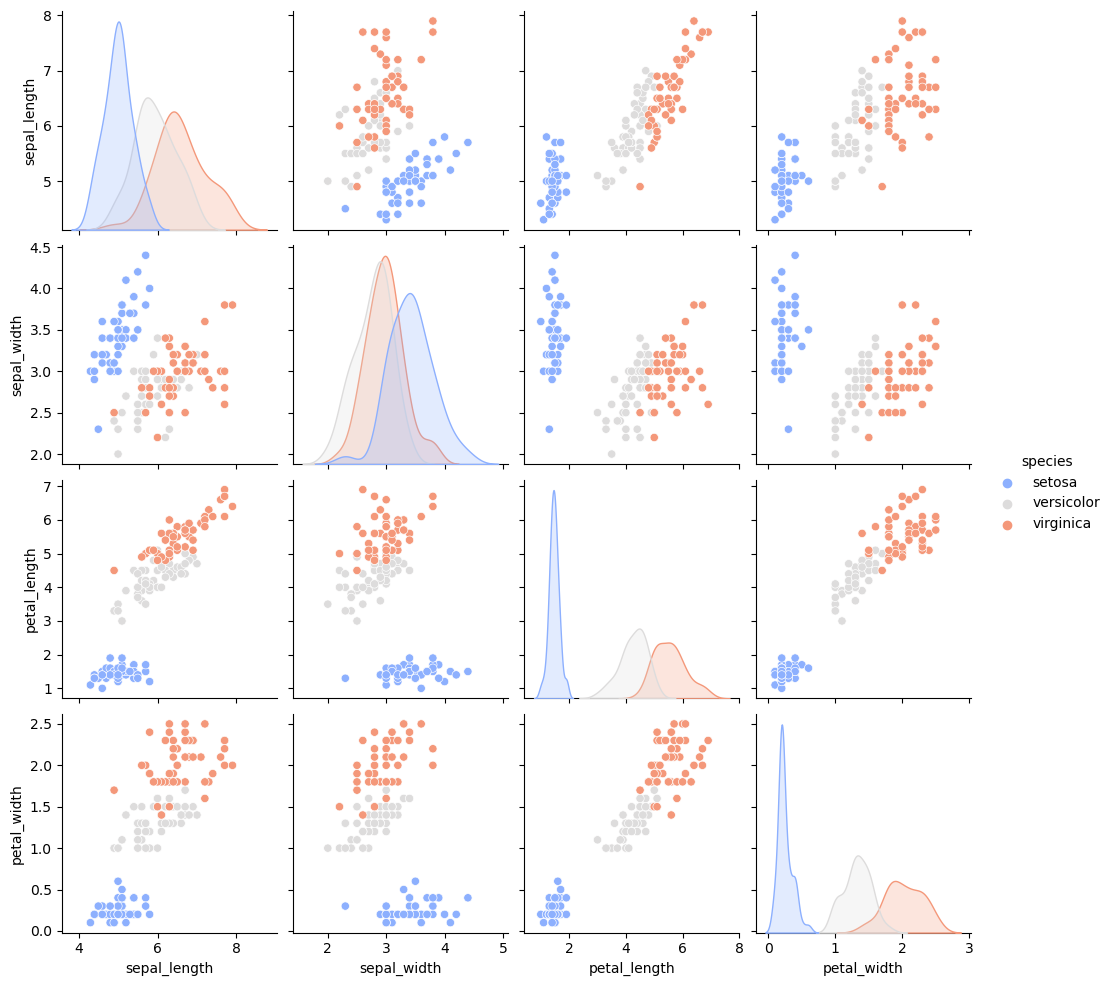

In [6]:
sns.pairplot(iris, hue="species", palette="coolwarm")
# shape of data should be less
plt.show()

In [7]:
X = iris.drop("species", axis=1)
y = iris["species"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X.shape[0]

150

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1234, test_size=0.2
)

In [11]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
98,5.1,2.5,3.0,1.1
126,6.2,2.8,4.8,1.8
40,5.0,3.5,1.3,0.3
133,6.3,2.8,5.1,1.5
77,6.7,3.0,5.0,1.7


In [12]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [13]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# multi-class classification / multiplable classification



        softmax regression is capable of doing multi-label classification directly but other model can do it
        so they ensemble technique to work with multilabel classification
        
        
        
        OvR -> One vs Rest 
        
                In general we OVR model to predict multi-class classification, it is fast and we only need to 
                train K models if we are having K class in output 
        
        
        OvO -> One vs One
        
                Best technique to predict multi-label classification but it is too costly in terms training the models
                as well as no of model wrt lables in output class 
                
        
        

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [15]:
log_model = LogisticRegression()
svm = SVC()

In [16]:
log_model.fit(X_train, y_train)
svm.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

### Evaluation of Classification Models

In [17]:
y_hat_train_log = log_model.predict(X_train)
y_hat_train_svm = svm.predict(X_train)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [19]:
print("logistic: ", accuracy_score(y_train, y_hat_train_log)*100)
print("SVM     : ", accuracy_score(y_train, y_hat_train_svm)*100)

logistic:  97.5
SVM     :  95.83333333333334


In [20]:
print("Confusion Matrix of Logistic Model")
print(confusion_matrix(y_train, y_hat_train_log))

Confusion Matrix of Logistic Model
[[41  0  0]
 [ 0 34  3]
 [ 0  0 42]]


In [21]:
print("Confusion Matrix of SVM Model")
print(confusion_matrix(y_train, y_hat_train_svm))

Confusion Matrix of SVM Model
[[41  0  0]
 [ 0 33  4]
 [ 0  1 41]]


In [23]:
print(classification_report(y_train, y_hat_train_log))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       1.00      0.92      0.96        37
   virginica       0.93      1.00      0.97        42

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120

